In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100  # make plots bigger
import numpy as np

In [29]:
data1 = np.load('PATH TO BASELINE MODEL ATTACK DISTANCES')['l2']
data2 = np.load('PATH TO COHEN MODEL ATTACK DISTANCES')['l2']
data3 = np.load('PATH TO SALMAN MODEL ATTACK DISTANCES')['l2']
data4 = np.load('PATH TO OUR MODEL ATTACK DISTANCES')['l2']

In [30]:
# only keep strictly positive distances
data1 = data1[data1>0]
data2 = data2[data2>0]
data3 = data3[data3>0]
data4 = data4[data4>0]

In [31]:
# make cdf (increasing) data
x_axis = np.linspace(0,max([max(data1).item(), max(data2).item(), max(data3).item(), max(data4).item()]), 1000)
data1_cdf = [(data1<x_axis[i]).sum().item()/len(data1) for i in range(1000)]
data2_cdf = [(data2<x_axis[i]).sum().item()/len(data2) for i in range(1000)]
data3_cdf = [(data3<x_axis[i]).sum().item()/len(data3) for i in range(1000)]
data4_cdf = [(data4<x_axis[i]).sum().item()/len(data4) for i in range(1000)]

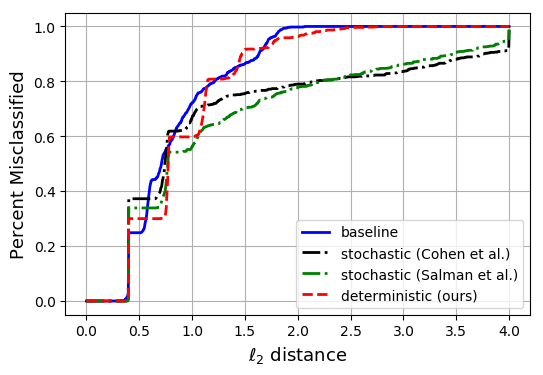

In [32]:
plt.plot(x_axis, data1_cdf, 'b-', label="baseline", linewidth=2)
plt.plot(x_axis, data2_cdf, 'k-.', label="stochastic (Cohen et al.)", linewidth=2)
plt.plot(x_axis, data3_cdf, 'g-.', label="stochastic (Salman et al.)", linewidth=2)
plt.plot(x_axis, data4_cdf, 'r--', label="deterministic (ours)", linewidth=2)
#plt.xscale('log')
plt.grid(True)
plt.legend(prop={'size': 10})
plt.xlabel("$\ell_2$ distance", fontsize=13)
plt.ylabel("Percent Misclassified", fontsize=13)
plt.savefig("PATH TO SAVE LOCATION",bbox_inches='tight')
plt.show()